Image Preprocessing

In [1]:
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range =0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Breast-Cancer-Risk-Prediction-main/breastcancerdataset/test", target_size=(64,64),batch_size=32,class_mode='binary')
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Breast-Cancer-Risk-Prediction-main/breastcancerdataset/train",target_size=(64,64),batch_size=32,class_mode='binary')


Found 22 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


Model Building

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.layers import MaxPooling2D

In [6]:
model=Sequential()

In [7]:
model.add(Conv2D(64,(3, 3),activation='relu', input_shape=(75, 75, 3)))

In [8]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [9]:
model.add(Flatten())

In [10]:
model.add(Dense(units= 40 ,kernel_initializer='random_uniform',activation = 'relu'))

In [11]:
model.add(Dense(units= 2,activation = 'softmax',kernel_initializer= 'uniform'))

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.save('breastcancer.h5')

Test The Model

In [14]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [15]:
model = load_model("breastcancer.h5")

In [16]:
img = image.load_img(r"/content/drive/MyDrive/Breast-Cancer-Risk-Prediction-main/benign.png",target_size = (75,75))

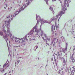

In [17]:
img


In [18]:
x  = image.img_to_array(img)


In [19]:
x = np.expand_dims(x,axis = 0)

In [20]:
pred=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 408ms/step


In [21]:
pred

array([0])

In [22]:
index=['benign','malignant']

In [23]:
index[pred[0]]

'benign'